In [2]:
#
# Project 1, part B Regression Problem
# By : Edward Christopher U1720912K
#

import tensorflow as tf
import numpy as np
import pylab as plt
from sklearn import model_selection
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras import layers
from keras import models
import os, shutil
from keras import optimizers, regularizers
from keras import callbacks
from keras.initializers import TruncatedNormal

# callback to manually print loss
class Test1(callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if epochs % 1000 == 0:
            print("iter", epochs, logs['loss'], logs['val_loss']) #a random function


Using TensorFlow backend.


In [3]:
#init values
NUM_FEATURES = 7
beta = 0.001
learning_rate = 0.01
epochs = 10000
batch_size = 8
num_neuron = 30
seed = 10
np.random.seed(seed)

In [4]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

#shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

# experiment with small datasets
#trainX = X_data[:300]
#trainY = Y_data[:300]

trainX, testX, trainY, testY = model_selection.train_test_split(
    X_data, Y_data, test_size=0.3, random_state=42)
trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)
testX = (testX - np.mean(testX, axis=0))/np.std(testX, axis =0)


iter 0: train error 0.0894096 0.0915884
iter 500: train error 0.0061344 0.00796008
iter 1000: train error 0.00520498 0.00717343
iter 1500: train error 0.00462039 0.00662395
iter 2000: train error 0.00424293 0.00625072
iter 2500: train error 0.00397849 0.00598916
iter 3000: train error 0.00377896 0.00575193
iter 3500: train error 0.00361229 0.00558784
iter 4000: train error 0.00347275 0.00553011
iter 4500: train error 0.00339173 0.00545402
iter 5000: train error 0.00334028 0.00538483
iter 5500: train error 0.00330742 0.0053609
iter 6000: train error 0.00328546 0.00535889
iter 6500: train error 0.00327436 0.00535148
iter 7000: train error 0.00326644 0.00535442
iter 7500: train error 0.00325609 0.00537137
iter 8000: train error 0.00323808 0.00535409
iter 8500: train error 0.00322067 0.00533849
iter 9000: train error 0.00321245 0.00533786
iter 9500: train error 0.00320924 0.00534274


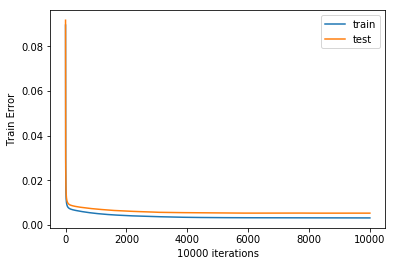

In [5]:
# Create the model
x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
y_ = tf.placeholder(tf.float32, [None, 1])

# Build the graph for the deep net

hidden_units = 10

"""
weights = tf.Variable(
    tf.truncated_normal([NUM_FEATURES, 1],
                        stddev=1.0 / np.sqrt(float(NUM_FEATURES))),
    name='weights')
biases = tf.Variable(tf.zeros([1]),
                        name='biases')

y = tf.matmul(x, weights) + biases

"""
weights = tf.Variable(
    tf.truncated_normal([NUM_FEATURES, hidden_units],
                        stddev=1.0 / np.sqrt(float(NUM_FEATURES))),
    name='weights')
biases = tf.Variable(tf.zeros([hidden_units]),
                        name='biases')

hidden = tf.nn.relu(tf.matmul(x, weights) + biases)
    

weights_2 = tf.Variable(
    tf.truncated_normal([hidden_units, 1],
                        stddev=1.0 / np.sqrt(float(hidden_units))),
    name='weights')
biases_2 = tf.Variable(tf.zeros([1]),
                        name='biases')
    
y = tf.matmul(hidden, weights_2) + biases_2

#Create the gradient descent optimizer with the given learning rate.
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
regularizer = tf.nn.l2_loss(weights) + tf.nn.l2_loss(weights_2)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(y - y_) + beta * regularizer, axis=1)) 
train_op = optimizer.minimize(loss)


with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())
	train_err = []
	test_err =  []
	for i in range(epochs):
		for start, end in zip(range(0, len(trainX), batch_size), range(batch_size, len(trainX), batch_size)):
			train_op.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})
		err = loss.eval(feed_dict={x: trainX, y_: trainY})
		train_err.append(err)
		err = loss.eval(feed_dict={x: testX, y_: testY})
		test_err.append(err)
		if i % 500 == 0:
			print('iter %d: train error %g %g'%(i, train_err[i], test_err[i]))
    
# save values
	w = weights.eval(session = sess)
	b = biases.eval(session=sess)
	oW = weights_2.eval(session=sess)
	oB = biases_2.eval(session=sess)
    

# plot learning curves
plt.figure(1)
plt.plot(range(epochs), train_err, label ="train")
plt.plot(range(epochs), test_err, label = "test")
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train Error')
plt.legend()
plt.show()


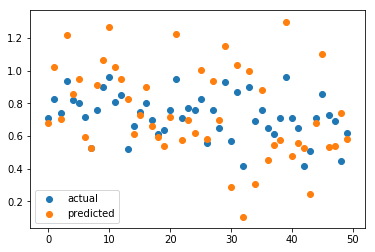

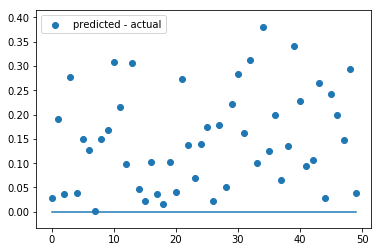

In [119]:
# Generate Scatter Plot for predicted vs label/actual
# get 50 samples
demoY = testY[50:100]
demoX = testX[50:100]

# recreate "MODEL"
h = tf.matmul(x, w) + b
#o = h
o = tf.matmul(h, oW) + oB

# simulate model
with tf.Session() as sess:
	result = sess.run(o, feed_dict={x:demoX})
	error = sess.run(o-demoY, feed_dict={x:demoX})

plt.figure(2)
plt.scatter(range(len(demoY)), demoY, label="actual")
plt.scatter(range(len(demoX)), result, label="predicted")
plt.legend()
plt.show()

plt.figure(3)
plt.scatter(range(len(demoY)), abs(error), label="predicted - actual")
plt.plot(range(len(demoY)), [0]*(len(demoY)))
plt.legend()
plt.show()

In [126]:
#Recursive Feature Elimination

#init
epochs = 2000
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

# RFE
def RFE2(NUM_FEATURES, best_acc, X_data, Y_data):
    if NUM_FEATURES < 1:
        return best_acc
    
    # recreate the model
    x = tf.placeholder(tf.float32, [None, NUM_FEATURES-1])
    y_ = tf.placeholder(tf.float32, [None, 1])

    # Build the graph for the deep net
    hidden_units = 10

    weights = tf.Variable(
        tf.truncated_normal([NUM_FEATURES-1, hidden_units],
                            stddev=1.0 / np.sqrt(float(5))),
        name='weights')
    biases = tf.Variable(tf.zeros([hidden_units]),
                         name='biases')

    hidden = tf.nn.relu(tf.matmul(x, weights) + biases)


    weights_2 = tf.Variable(
        tf.truncated_normal([hidden_units, 1],
                            stddev=1.0 / np.sqrt(float(hidden_units))),
        name='weights')
    biases_2 = tf.Variable(tf.zeros([1]),
                           name='biases')

    y = tf.matmul(hidden, weights_2) + biases_2

    
    #Create the gradient descent optimizer with the given learning rate.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    regularizer = tf.nn.l2_loss(weights) + tf.nn.l2_loss(weights_2)
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_ - y) + beta * regularizer, axis =1))
    train_op = optimizer.minimize(loss)
    
    result = []
    for j in range(NUM_FEATURES):
        
        # Remove one input feature (from remaining array)
        X_data2 = X_data
        X_data2 = np.delete(X_data, j, 1)
        
        # Shuffle Data
        idx = np.arange(X_data2.shape[0])
        np.random.shuffle(idx)
        X_data2, Y_data = X_data2[idx], Y_data[idx]
        
        trainX, testX, trainY, testY = model_selection.train_test_split(
            X_data2, Y_data, test_size=0.3, random_state=42)
        trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)
        testX = (testX - np.mean(testX, axis=0))/np.std(testX, axis =0)
        
        
        print("Features: ", NUM_FEATURES-1, "Removed: ", j)
        # Train Model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            train_err = []
            test_err =  []
            for i in range(epochs):
                for start, end in zip(range(0, len(trainX), batch_size), range(batch_size, len(trainX), batch_size)):
                    train_op.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})
                err = loss.eval(feed_dict={x: trainX, y_: trainY})
                train_err.append(err)
                err = loss.eval(feed_dict={x: testX, y_: testY})
                test_err.append(err)
                if i % 1000 == 0:
                    print('iter %d: train error %g %g'%(i, train_err[i], test_err[i]))
            print("error", train_err[epochs -1], test_err[epochs-1])
            result.append(test_err[epochs-1])
    remove_index = result.index(min(result))
    if (result[remove_index] > best_acc):
        return best_acc
    else:
        print(result)
        print("Removed index: ", remove_index, "with Least Error: ", result[remove_index])
        X_data2 = X_data
        X_data2 =  np.delete(X_data, remove_index, 1)
        check = RFE2(NUM_FEATURES-1, result[remove_index], X_data2, Y_data)
    return check
        
print("Function Complete, Least Error",  RFE2(7, 1, X_data, Y_data))        
        

Features:  6 Removed:  0
iter 0: train error 0.133809 0.120729
iter 1000: train error 0.00635589 0.00820429
error 0.00478225 0.006739842
Features:  6 Removed:  1
iter 0: train error 0.184812 0.196461
iter 1000: train error 0.0206337 0.0228893
error 0.019469082 0.022652287
Features:  6 Removed:  2
iter 0: train error 0.13773 0.140713
iter 1000: train error 0.0201613 0.0279338
error 0.018742837 0.028139766
Features:  6 Removed:  3
iter 0: train error 0.127178 0.118714
iter 1000: train error 0.0211904 0.0240173
error 0.019399142 0.02277181
Features:  6 Removed:  4
iter 0: train error 0.114863 0.146483
iter 1000: train error 0.0203658 0.0247775
error 0.01899002 0.0244157
Features:  6 Removed:  5
iter 0: train error 0.152158 0.159158
iter 1000: train error 0.0203581 0.0245539
error 0.0185477 0.024574788
Features:  6 Removed:  6
iter 0: train error 0.147843 0.11485
iter 1000: train error 0.0200896 0.0245479
error 0.018605035 0.024897613
[0.006739842, 0.022652287, 0.028139766, 0.02277181, 0.0

iter 0 1.38021286044802 1.076244552930196
iter 1000 0.010245704544442041 0.011832568670312564
iter 2000 0.009057095793208906 0.010655662200103203
iter 3000 0.00824703113841159 0.00983156446988384
iter 4000 0.007606240574802671 0.009173643092314403
iter 5000 0.0070763992943934035 0.008610399005313714
iter 6000 0.006629486727927412 0.00812767529860139
iter 7000 0.006236592068203858 0.00769746278723081
iter 8000 0.005889626938317503 0.0073118799676497774
iter 9000 0.005592712773276227 0.006992882148673137
iter 10000 0.005343991651066712 0.006741587212309242
iter 11000 0.00514468200770872 0.006529451503107945
iter 12000 0.0049822553593133175 0.006350976120059689
iter 13000 0.00483111740156476 0.006211700259397427
iter 14000 0.004693327884056738 0.006094927449400226
iter 15000 0.004567093392168837 0.005976687092334032
iter 16000 0.004456500363137041 0.005885877987990776
iter 17000 0.004359805956482887 0.005832481384277344
iter 18000 0.00427789184863546 0.005793783984457453
iter 19000 0.0041

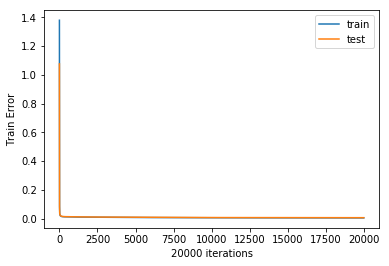

In [194]:
# 3 Layered model w/ and w/o dropout
b = Test1()
epochs = 20000
model = models.Sequential()

model.add(layers.Dense(10, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
# Add DROPOUT HERE (Uncomment to add dropout )
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, kernel_initializer=TruncatedNormal(mean = 0, stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))

model.compile(loss='mse', 
              optimizer=optimizers.SGD(lr=1e-3))

admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,2:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

#trainX = X_data
#trainY = Y_data
trainX, testX, trainY, testY = model_selection.train_test_split(
    X_data, Y_data, test_size=0.3, random_state=42)
trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)
testX = (testX - np.mean(testX, axis=0))/np.std(testX, axis =0)


result = model.fit(trainX,
              trainY,
              epochs=epochs,
              batch_size=8,
              verbose=0,
              validation_data=(testX, testY), 
              callbacks=[b])


loss = result.history['loss']
val_loss = result.history['val_loss']
print("3-layer")
print(result.history['loss'][epochs-1], result.history['val_loss'][epochs-1])
plt.figure(1)
plt.plot(range(epochs), loss, label ="train")
plt.plot(range(epochs), val_loss, label = "test")
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train Error')
plt.legend()
plt.show()


In [185]:
# reshuffle data for 4 layered or 5 layered
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,2:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

trainX, testX, trainY, testY = model_selection.train_test_split(
    X_data, Y_data, test_size=0.3, random_state=42)
trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)
testX = (testX - np.mean(testX, axis=0))/np.std(testX, axis =0)


iter 0 4.475906927245004 2.0496851603190103
iter 1000 0.5907868419374739 0.6388663649559021
iter 2000 0.5132313541003636 0.544290824731191
iter 3000 0.44650942172322955 0.4678268829981486
iter 4000 0.38869803036962236 0.4041374166806539
iter 5000 0.33855001841272625 0.3501294473807017
iter 6000 0.2950406917503902 0.3039850930372874
iter 7000 0.25726284640175956 0.26445260842641194
iter 8000 0.22447005595479694 0.23035417199134828
iter 9000 0.19597864917346408 0.20096533993879953
iter 10000 0.17124464895044053 0.17544779777526856
iter 11000 0.14975572654179165 0.1533567706743876
iter 12000 0.1310820004769734 0.13424143493175505
iter 13000 0.11485016345977783 0.11763843943675359
iter 14000 0.10075218911681856 0.10321965465943019
iter 15000 0.08847576443638121 0.09071775327126184
iter 16000 0.07780504545995168 0.07984395325183868
iter 17000 0.0685295194387436 0.07038811395565668
iter 18000 0.06047821311014039 0.06215472196539243
iter 19000 0.05346485387001719 0.05497078647216161


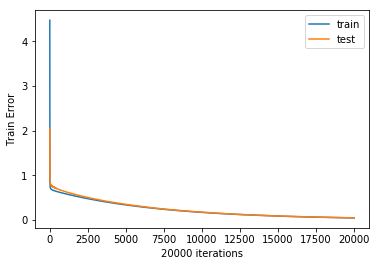

In [187]:
# 4 layered model  w/o dropout

b = Test1()
epochs = 20000
model = models.Sequential()
"""
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
"""
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dense(1, kernel_initializer=TruncatedNormal(mean = 0, stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))

model.compile(loss='mse', 
              optimizer=optimizers.SGD(lr=1e-3))


result = model.fit(trainX,
              trainY,
              epochs=epochs,
              batch_size=8,
              verbose=0,
              validation_data=(testX, testY), 
              callbacks=[b])


loss = result.history['loss']
val_loss = result.history['val_loss']
print("4-layer w/o dropout")
print(result.history['loss'][epochs-1], result.history['val_loss'][epochs-1])
plt.figure(1)
plt.plot(range(epochs), loss, label ="train")
plt.plot(range(epochs), val_loss, label = "test")
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train Error')
plt.legend()
plt.show()


In [ ]:
# 4 layered model  w/ dropout

b = Test1()
epochs = 20000
model = models.Sequential()
"""
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
"""
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, kernel_initializer=TruncatedNormal(mean = 0, stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))

model.compile(loss='mse', 
              optimizer=optimizers.SGD(lr=1e-3))


result = model.fit(trainX,
              trainY,
              epochs=epochs,
              batch_size=8,
              verbose=0,
              validation_data=(testX, testY), 
              callbacks=[b])


loss = result.history['loss']
val_loss = result.history['val_loss']
print("4-layer w/ dropout")
print(result.history['loss'][epochs-1], result.history['val_loss'][epochs-1])
plt.figure(1)
plt.plot(range(epochs), loss, label ="train")
plt.plot(range(epochs), val_loss, label = "test")
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train Error')
plt.legend()
plt.show()


In [ ]:
# 5 layered with dropout 

b = Test1()
epochs = 20000

# model definition
model = models.Sequential()

model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, input_shape=(6,),kernel_initializer=TruncatedNormal(mean = 0, stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))


model.compile(loss='mse', 
              optimizer=optimizers.SGD(lr=1e-3))


result = model.fit(trainX,
              trainY,
              epochs=epochs,
              batch_size=8,
              verbose=0,
              validation_data=(testX, testY), 
              callbacks=[b])


loss = result.history['loss']
val_loss = result.history['val_loss']
print("5-layer w/ dropout")
print(result.history['loss'][epochs-1], result.history['val_loss'][epochs-1])
plt.figure(1)
plt.plot(range(epochs), loss, label ="train")
plt.plot(range(epochs), val_loss, label = "test")
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train Error')
plt.legend()
plt.show()

In [ ]:
# 5 layered w/o dropout 

b = Test1()
epochs = 20000

# model definition
model = models.Sequential()

model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu', input_shape=(6,), 
                        kernel_initializer=TruncatedNormal(mean = 0,stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))
#model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, input_shape=(6,),kernel_initializer=TruncatedNormal(mean = 0, stddev=0.408), 
                        kernel_regularizer=regularizers.l2(0.001),
                        bias_initializer='zeros'))


model.compile(loss='mse', 
              optimizer=optimizers.SGD(lr=1e-3))


result = model.fit(trainX,
              trainY,
              epochs=epochs,
              batch_size=8,
              verbose=0,
              validation_data=(testX, testY), 
              callbacks=[b])


loss = result.history['loss']
val_loss = result.history['val_loss']
print("5-layer w/o dropout")
print(result.history['loss'][epochs-1], result.history['val_loss'][epochs-1])
plt.figure(1)
plt.plot(range(epochs), loss, label ="train")
plt.plot(range(epochs), val_loss, label = "test")
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train Error')
plt.legend()
plt.show()

In [ ]:
# UNUSED CODE
#read and divide data into test and train sets 
NUM_FEATURES = 5
for f in range(0, 7):
    admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
    X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
    Y_data = Y_data.reshape(Y_data.shape[0], 1)
    X_data2 = np.delete(X_data, f, 1)
    for j in range(f+1, 7):
        X_data = np.delete(X_data2, j-1, 1)
        print(f, j)
        #shuffle
        idx = np.arange(X_data.shape[0])
        np.random.shuffle(idx)
        X_data, Y_data = X_data[idx], Y_data[idx]

        trainX, testX, trainY, testY = model_selection.train_test_split(
            X_data, Y_data, test_size=0.3, random_state=42)
        trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)
        testX = (testX - np.mean(testX, axis=0))/np.std(testX, axis =0)
        # Create the model
        x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
        y_ = tf.placeholder(tf.float32, [None, 1])

        # Build the graph for the deep net
        hidden_units = 10

        weights = tf.Variable(
            tf.truncated_normal([NUM_FEATURES, hidden_units],
                                stddev=1.0 / np.sqrt(float(5))),
            name='weights')
        biases = tf.Variable(tf.zeros([hidden_units]),
                             name='biases')

        hidden = tf.nn.relu(tf.matmul(x, weights) + biases)


        weights_2 = tf.Variable(
            tf.truncated_normal([hidden_units, 1],
                                stddev=1.0 / np.sqrt(float(hidden_units))),
            name='weights')
        biases_2 = tf.Variable(tf.zeros([1]),
                               name='biases')

        y = tf.matmul(hidden, weights_2) + biases_2



        #Create the gradient descent optimizer with the given learning rate.
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        regularizer = tf.nn.l2_loss(weights) #+ tf.nn.l2_loss(weights_2)
        loss = tf.reduce_mean(tf.square(y_ - y) + 0.001 * regularizer)
        train_op = optimizer.minimize(loss)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            train_err = []
            test_err =  []
            for i in range(epochs):
                train_op.run(feed_dict={x: trainX, y_: trainY})
                err = loss.eval(feed_dict={x: trainX, y_: trainY})
                train_err.append(err)
                err = loss.eval(feed_dict={x: testX, y_: testY})
                test_err.append(err)
                if i % 100 == 0:
                    print('iter %d: train error %g %g'%(i, train_err[i], test_err[i]))
            print(train_err[epochs-1], test_err[epochs-1])
        
        # plot learning curves         
        """
        plt.figure(1)
        plt.plot(range(epochs), train_err, label ="train")
        plt.plot(range(epochs), test_err, label = "test")
        plt.xlabel(str(epochs) + ' iterations')
        plt.ylabel('Train Error')
        plt.legend()
        plt.show()
        """

In [120]:
#UNUSED CODE
#RFE
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn import datasets

svm = SVR(kernel="linear")
# create the RFE model for the svm classifier 
# and select attributes

rfe = RFE(svm, 5)
rfe = rfe.fit(X_data, Y_data)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True  True False  True  True  True]
[2 1 1 3 1 1 1]
